In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
from four_points_transform import four_points_transform
import pytesseract as pt


In [3]:
def show(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')

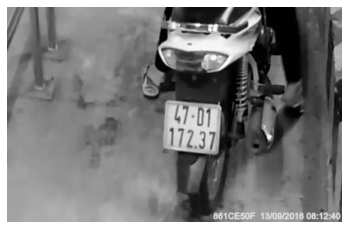

In [4]:
path = r'test\0112_01081_b.jpg'
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show(gray)

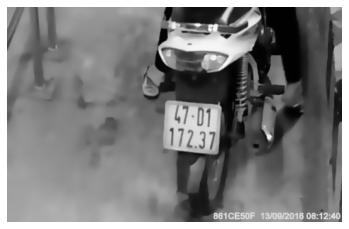

In [5]:
blured = cv2.bilateralFilter(gray, 11, 17, 17)
show(blured)

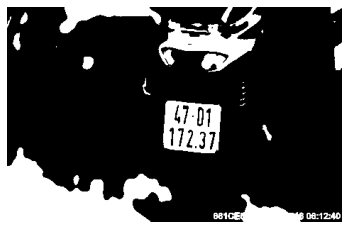

In [6]:
ret,th1 = cv2.threshold(blured,150,255,cv2.THRESH_BINARY)
show(th1)

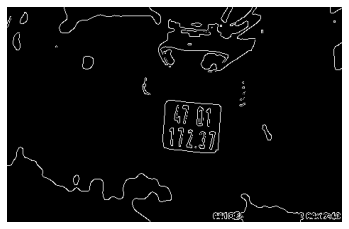

In [7]:
edged = cv2.Canny(th1, 100, 200)
show(edged)

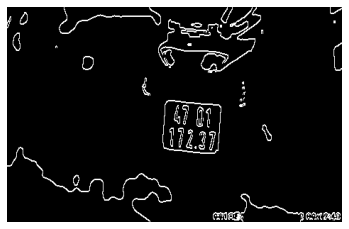

In [8]:
dilated = cv2.dilate(edged, (3,3))
show(dilated)

In [9]:
keypoints = cv2.findContours(dilated.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE )
cnts = imutils.grab_contours(keypoints)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]

In [10]:
location = 0

for cnt in cnts:
    peri = cv2.arcLength(cnt, True)
    print(peri)
    approx = cv2.approxPolyDP(cnt, 0.05*peri , True)
    if len(approx) == 4 and cv2.contourArea(cnt) > 2500:
        location = approx
        break

295.25483310222626


In [11]:
location

array([[[224, 133]],

       [[221, 199]],

       [[297, 202]],

       [[298, 137]]], dtype=int32)

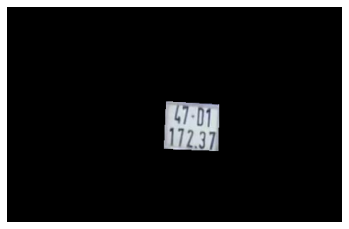

In [12]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1, )
new_image = cv2.bitwise_and(image, image, mask=mask)
show(new_image)


In [13]:
v1 = location[0][0]
v2 = location[1][0]
v3 = location[2][0]
v4 = location[3][0]
points =  np.array([v1, v2, v3, v4])

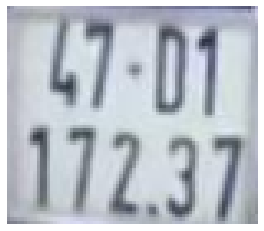

In [14]:

cropped_image = four_points_transform(image, points)
show(cropped_image)


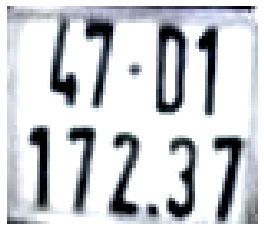

In [15]:
cropped_image = cv2.detailEnhance(cropped_image, sigma_s=80, sigma_r=0.7)
show(cropped_image)
cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

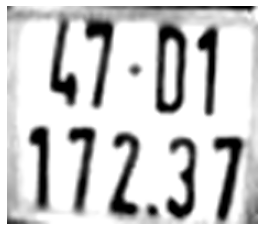

In [23]:
gray = cv2.resize( cropped_image, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)
blur = cv2.GaussianBlur(gray, (5,5), 0)
gray = cv2.medianBlur(gray, 3)
show(gray)

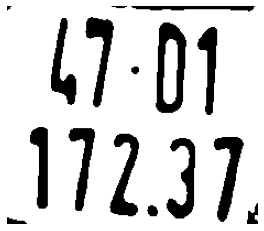

In [29]:
r, th3 = cv2.threshold(blur,127, 255, cv2.THRESH_BINARY)
show(th3)

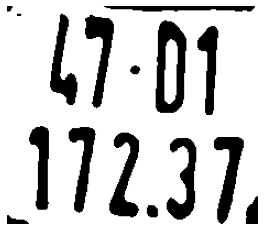

In [44]:
ret, thresh = cv2.threshold(blur,127, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
show(thresh)
result = thresh

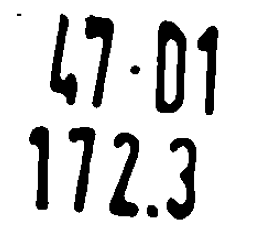

In [45]:
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = cnts[0] if len(cnts) == 2 else cnts[1]
mask2 = np.zeros(thresh.shape, np.uint8)
cv2.fillPoly(mask2, cnt, [255,255,255])
mask2 = 255 - mask2
result = cv2.bitwise_or(thresh, mask2)
show(result)

(103, 228)


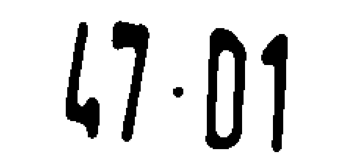

In [41]:
high_part =result[:][:int(result.shape[1]/2.2)]
# high_part = cv2.dilate(high_part, (5,5))
# high_part = cv2.resize(high_part, (78, 36))
show(high_part)
print(high_part.shape)


(103, 228)


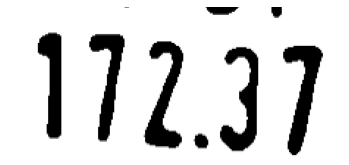

In [42]:
low_part = result[:][int(result.shape[1]/2.5):]
low_part = cv2.resize(low_part, (high_part.shape[1], high_part.shape[0]))
print(low_part.shape)
show(low_part)

In [43]:
pt.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# remember to set PATH for pytesseract
text_low = pt.image_to_string(low_part,  config='-c tessedit_char_whitelist=0123456789 --psm 8 --oem 3')
text_high = pt.image_to_string(high_part,  config='-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ --psm 8 --oem 3')
text = text_high + text_low
print(text)

470
11237

